# Tarea - Ajuste de curvas

*Nombre: Camila Daniela Zapata Castañeda*

*Fecha: 14 de Septiembre del 2023*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [127]:
import numpy as np
# Datos extraidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 26$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

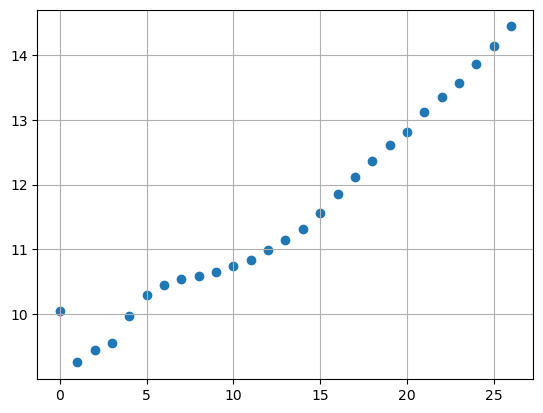

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 26, len(data))
y = data

plt.figure()
plt.scatter(x, y)
plt.grid()

In [129]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [130]:
# Plantear modelo 
#y = b0 + b1*x

# Factores
# - 1
# - x

beta = np.random.rand(2)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])

X = np.hstack((ones, x_factor))

y_vector = np.reshape(data,[m,1])

funcion_de_costo(beta, X, y)

617.3389019449041

In [131]:
import scipy.optimize as opt
opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.3704889518166
        x: [ 9.116e+00  1.867e-01]
      nit: 3
      jac: [ 2.950e-06  2.682e-06]
 hess_inv: [[ 7.011e-02 -3.968e-03]
            [-3.968e-03  3.053e-04]]
     nfev: 15
     njev: 5

In [132]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2

# Factores
# - 1
# - x
# - x**2

beta = np.random.rand(3)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])

X = np.hstack((ones, x_factor, x2_factor))

y_vector = np.reshape(data,[m,1])

opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.8443845157070811
        x: [ 9.591e+00  7.252e-02  4.390e-03]
      nit: 5
      jac: [-1.683e-04 -1.556e-03  6.094e-03]
 hess_inv: [[ 1.442e-01 -2.175e-02  6.841e-04]
            [-2.175e-02  4.574e-03 -1.642e-04]
            [ 6.841e-04 -1.642e-04  6.315e-06]]
     nfev: 168
     njev: 39

In [133]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2 + b3*x**3

# Factores
# - 1
# - x
# - x**2
# - x**3

beta = np.random.rand(4)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])
x3_factor = np.reshape(x**3,[m,1])

X = np.hstack((ones, x_factor, x2_factor, x3_factor))

y_vector = np.reshape(data,[m,1])

opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.8404346168293201
        x: [ 9.568e+00  8.465e-02  3.202e-03  3.047e-05]
      nit: 8
      jac: [ 3.347e-05 -2.905e-05 -3.760e-03 -8.497e-02]
 hess_inv: [[ 2.272e-01 -6.411e-02  4.834e-03 -1.064e-04]
            [-6.411e-02  2.621e-02 -2.285e-03  5.438e-05]
            [ 4.834e-03 -2.285e-03  2.142e-04 -5.330e-06]
            [-1.064e-04  5.438e-05 -5.330e-06  1.367e-07]]
     nfev: 237
     njev: 45

In [134]:
def f1(x) :
    return 9.116 + 0.1867*x
def f2(x):
    return 9.591 + 7.252e-02*x + 4.390e-03*x**2
def f3(x):
    return 9.568 + 8.465e-02*x + 3.202e-03*x**2 + 3.047e-05*x**3

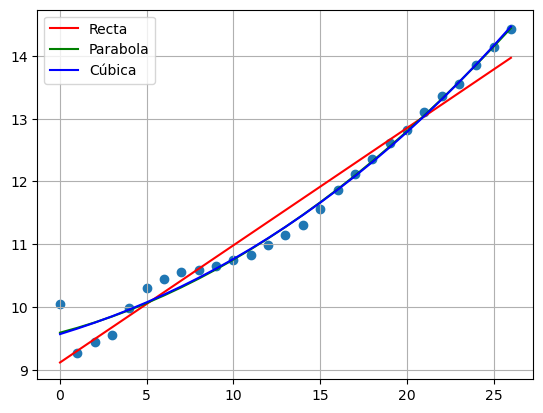

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x),"r", label= "Recta")
plt.plot(x, f2(x),"g", label= "Parabola")
plt.plot(x, f3(x),"b", label= "Cúbica")
plt.legend(loc= "best")
plt.grid()


---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

---

In [57]:
import pandas as pd

data = pd.read_csv("population_data.csv")
data

,Year,Poblacion,Nacimientos,Decesos
0,1950,28296,1174947,418430
1,1951,29110,1183788,458238
2,1952,29980,1195209,408823
3,1953,30904,1261775,446127
4,1954,31880,1339837,378752
...,...,...,...,...
61,2011,115683,2586287,590693
62,2012,117054,2498880,602354
63,2013,118395,2478889,623599
64,2014,119713,2463420,633641


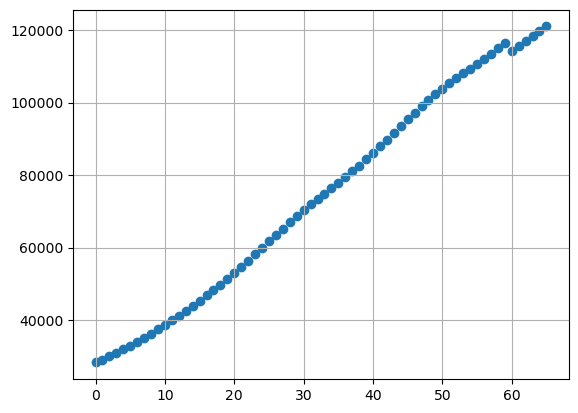

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

m = len(data)
x = np.linspace(0, m-1, m)
y = data["Poblacion"]

plt.figure()
plt.scatter(x, y)
plt.grid()

In [59]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [60]:
# Plantear modelo 
#y = b0 + b1*x

# Factores
# - 1
# - x

beta = np.random.rand(2)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])

X = np.hstack((ones, x_factor))

y = data["Poblacion"].to_numpy()
y_vector = np.reshape(y,[m,1])


import scipy.optimize as opt
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 212137169.54521668
        x: [ 2.414e+04  1.544e+03]
      nit: 10
      jac: [ 0.000e+00  2.000e+00]
 hess_inv: [[ 3.929e-03 -9.681e-05]
            [-9.681e-05  7.753e-06]]
     nfev: 156
     njev: 49

In [61]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2

# Factores
# - 1
# - x
# - x**2

beta = np.random.rand(3)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])

X = np.hstack((ones, x_factor, x2_factor))


y = data["Poblacion"].to_numpy()
y_vector = np.reshape(y,[m,1])


sol2 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 210941621.4495905
        x: [ 2.443e+04  1.517e+03  4.148e-01]
      nit: 10
      jac: [ 0.000e+00  0.000e+00 -2.000e+00]
 hess_inv: [[ 1.702e-08 -3.320e-09  2.170e-09]
            [-3.320e-09  6.353e-08 -3.325e-09]
            [ 2.170e-09 -3.325e-09  2.176e-09]]
     nfev: 186
     njev: 44

In [55]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2 + b3*x**3

# Factores
# - 1
# - x
# - x**2
# - x**3

beta = np.random.rand(4)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])
x3_factor = np.reshape(x**3,[m,1])

X = np.hstack((ones, x_factor, x2_factor, x3_factor))

y = data["Poblacion"].to_numpy()
y_vector = np.reshape(y,[m,1])

sol3 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 25240442.639109224
        x: [ 2.848e+04  7.391e+02  3.056e+01 -3.092e-01]
      nit: 8
      jac: [ 0.000e+00 -1.500e+00 -3.875e+01  3.450e+01]
 hess_inv: [[ 1.085e-01 -1.242e-02  3.791e-04 -3.375e-06]
            [-1.242e-02  1.955e-03 -6.785e-05  6.478e-07]
            [ 3.791e-04 -6.785e-05  2.520e-06 -2.510e-08]
            [-3.375e-06  6.478e-07 -2.510e-08  2.575e-10]]
     nfev: 236
     njev: 45

In [56]:
def f1(x) :
    return  2.414e+04 + 1.544e+03*x 
def f2(x):
    return  2.443e+04 + 1.517e+03*x + 4.148e-01*x**2        
def f3(x):
    return  2.848e+04 + 7.391e+02*x + 3.056e+01*x**2 - 3.092e-01*x**3

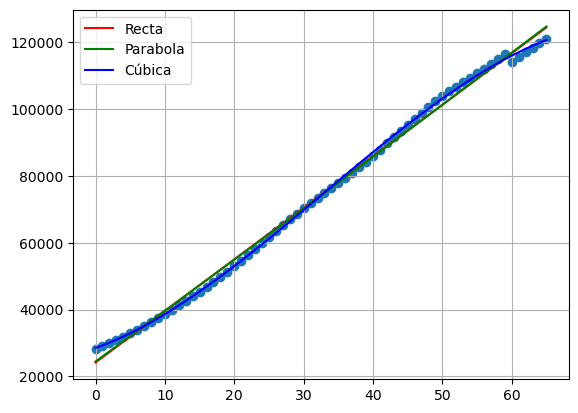

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data["Poblacion"].to_numpy()

plt.figure()
plt.scatter(x, y)
plt.plot(x, f1(x),"r", label= "Recta")
plt.plot(x, f2(x),"g", label= "Parabola")
plt.plot(x, f3(x),"b", label= "Cúbica")
plt.legend(loc= "best")
plt.grid()

<BarContainer object of 3 artists>

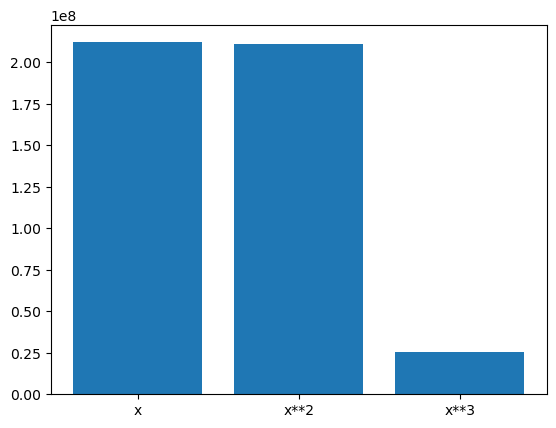

In [46]:
x = [1, 2, 3]
y = [sol1.fun, sol2.fun, sol3.fun]
etiquetas = ["x", "x**2", "x**3"]
fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)

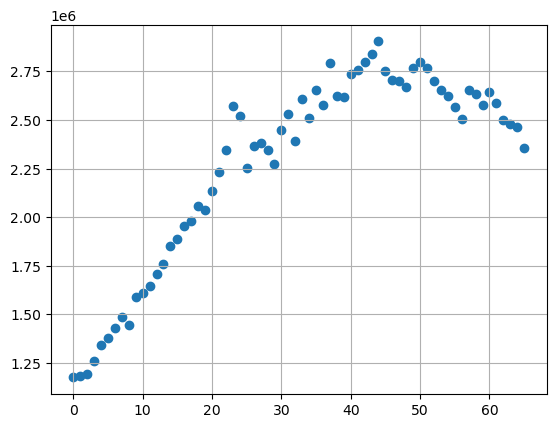

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

m = len(data)
x = np.linspace(0, m-1, m)
y = data["Nacimientos"]

plt.figure()
plt.scatter(x, y)
plt.grid()

In [27]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

In [32]:
# Plantear modelo 
#y = b0 + b1*x

# Factores
# - 1
# - x

beta = np.random.rand(2)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])

X = np.hstack((ones, x_factor))

y = data["Nacimientos"].to_numpy()
y_vector = np.reshape(y,[m,1])

import scipy.optimize as opt
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol1

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 4737916879580.587
        x: [ 1.563e+06  2.197e+04]
      nit: 6
      jac: [ 0.000e+00 -1.245e+06]
 hess_inv: [[ 1.770e-01 -3.908e-03]
            [-3.908e-03  9.052e-05]]
     nfev: 181
     njev: 57

In [33]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2

# Factores
# - 1
# - x
# - x**2

beta = np.random.rand(3)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])

X = np.hstack((ones, x_factor, x2_factor))

y = data["Nacimientos"].to_numpy()
y_vector = np.reshape(y,[m,1])

sol2 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 492921049017.871
        x: [ 1.021e+06  7.278e+04 -7.816e+02]
      nit: 13
      jac: [ 0.000e+00  0.000e+00  0.000e+00]
 hess_inv: [[ 2.836e-03  7.253e-03 -1.773e-04]
            [ 7.253e-03  1.856e-02 -4.536e-04]
            [-1.773e-04 -4.536e-04  1.109e-05]]
     nfev: 156
     njev: 39

In [34]:
# Plantear modelo 
#y = b0 + b1*x + b2*x**2 + b3*x**3

# Factores
# - 1
# - x
# - x**2
# - x**3

np.random.seed(4)
beta = np.random.rand(4)

m = len(data)
ones = np.ones([m, 1])
x_factor = np.reshape(x,[m,1])
x2_factor = np.reshape(x**2,[m,1])
x3_factor = np.reshape(x**3,[m,1])

X = np.hstack((ones, x_factor, x2_factor, x3_factor))

y = data["Nacimientos"].to_numpy()
y_vector = np.reshape(y,[m,1])

import scipy.optimize as opt
sol3 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))
sol3

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 441782337990.91626
        x: [ 1.088e+06  5.988e+04 -2.814e+02 -5.130e+00]
      nit: 9
      jac: [ 0.000e+00  0.000e+00  0.000e+00 -6.144e+04]
 hess_inv: [[ 7.670e-02 -8.720e-03  2.637e-04 -2.329e-06]
            [-8.720e-03  1.484e-03 -5.236e-05  5.026e-07]
            [ 2.637e-04 -5.236e-05  1.996e-06 -2.011e-08]
            [-2.329e-06  5.026e-07 -2.011e-08  2.094e-10]]
     nfev: 257
     njev: 49

In [20]:
def g1(x) :
    return  1.563e+06 + 2.198e+04*x  
def g2(x):
    return  1.021e+06 + 7.278e+04*x - 7.815e+02*x**2  
def g3(x):
    return  1.088e+06 + 5.988e+04*x - 2.814e+02*x**2 - 5.130e+00*x**3

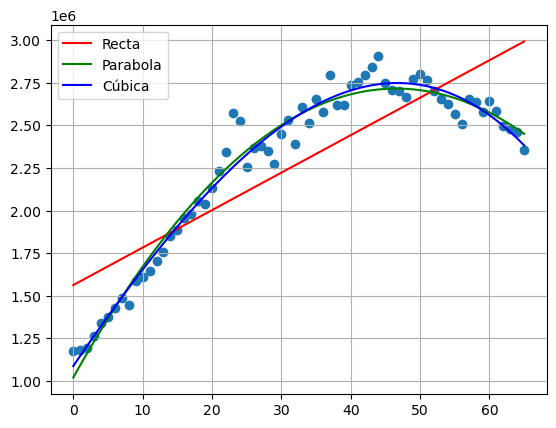

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

y = data["Nacimientos"].to_numpy()

plt.figure()
plt.scatter(x, y)
plt.plot(x, g1(x),"r", label= "Recta")
plt.plot(x, g2(x),"g", label= "Parabola")
plt.plot(x, g3(x),"b", label= "Cúbica")
plt.legend(loc= "best")
plt.grid()

<BarContainer object of 3 artists>

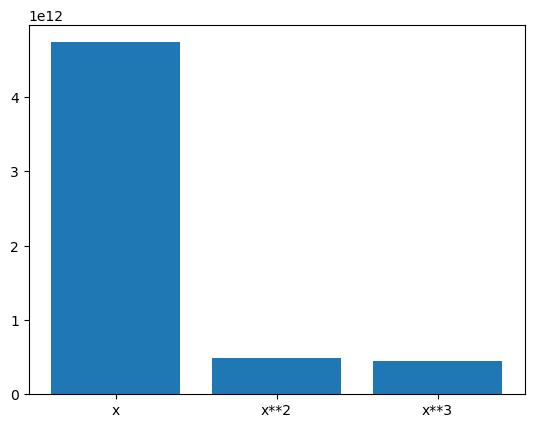

In [36]:
x = [1, 2, 3]
y = [sol1.fun, sol2.fun, sol3.fun]
etiquetas = ["x", "x**2", "x**3"]
fig, ax = plt.subplots()
ax.bar(x = x, height = y, tick_label = etiquetas)